## Notebook to support the algebraic derivations from the manuscript `Local analysis of Lower-Hybrid Drift Instabilities in a magnetic nozzle'

This notebook is used to present the derivations of Appendix A and B of the manuscript.
It is based on the SymPy library.\
\
As in the manuscript, we are interested in capturing the effect of the gyroviscous tensor on small time-dependent fluctuations of an equilibrium time-independent inhomogeneous two-fluid plasma. Under the assumption of small amplitude waves, each plasma quantity $Q$ is expanded as a zeroth-order, time independent part, plus a first-order contribution, through which we will model any oscillatory phenomena, 
$$
Q (\mathbf x, t) = Q_0 (\mathbf x) + \frac{1}{2} [Q_1 \left( \mathbf x \right) \exp\left( i \mathbf k \cdot \mathbf x - i \omega t \right) + CC],
$$
with $\mathbf x = s_\perp \mathbf 1_\perp + s_\theta \mathbf 1_\theta + s_\parallel \mathbf 1_\parallel$, being $s_{\perp, \theta, \parallel}$ local coordinates about the point of analysis, and with the subscripts $0$ and $1$ referring to equilibrium values and their first-order corrections, respectively. For our model to be local we consider $kL\gg1$, with $k$ the fluctuation wavenumber and $L$ the smallest characteristic length of the equilibrium plasma gradients. We will model the plasma as a two-species fluid. The use of a set of fluid equations to describe electrons is valid as long as the wavenumber is smaller than the electron Larmor radius at equilibrium, $k \rho_e < 1$.\
Furthermore, we assume our waves to have frequency $\omega$ much smaller than than the equilibrium electron gyrofrequency $\omega_{ce}$, respecting the ordering $\omega = O(\omega_{ce}\ \epsilon)$. We also assume to be in the low-drift regime, using a similar nomenclature to that adopted in [Ref.1 {ramo21}], with equilibrium electron velocity $u_{e0}$ much smaller than the electron thermal velocity at rest $c_e$, a condition expressed through the choice of ordering $u_{e0} = O(c_e \ \epsilon)$. \
\
The notebook is structured as follows: in the first section, the expression of the divergence of the first order gyroviscous tensor $\left(\frac{-\nabla\cdot\Pi_e}{m_e n_e}\right)_1$ is presented.\
In the second section, the expression for the elctron continuity and momentum equations are presented with the explicit contribution from the gyroviscous tensor, along with the expression for the matrix of coefficients $A_e$.\
In the third section, the expression for the determinant of $A_e$ is presented.\
\
NOTE: each cell of the present notebook depend on data computed in the cells above, so we recommend running each cell in the order with which they appear.

## Section I: Divergence of the Gyroviscous tensor

In this first section, the expressions for $\nabla\cdot\Pi_e$ at the $0^{\text{th}}$ and $1^{\text{st}}$ orders are presented. As in the main manuscript, we will work with power expansions of the small parameter $\epsilon=\rho_e/L$. We will consider only terms up to the $O(\epsilon \omega_{ce} \mathbf u_{e})$ order.\
\
We assume our plasma to be Maxwellian and the electron temperature to be isotropic, $T_{\perp e} = T_{\parallel e}$.
Moreover, being $\omega$ first order in $\epsilon$ relative to the electron gyrofrequency $\omega_{ce}$ and the slowest flow velocities to be of the order of the ion sound speed $c_s$, we can model the gyroviscous tensor according to the fast-dynamics ordering presented in [Ref.2 {ramo05a}]. With this set of assumptions we recover the Braginskii form of the tensor [Ref.3 {brag65}], which mainly depends on the gradient of the electron velocity. Its divergence is (Eq. B.1 of the manuscript)
$$
    - \frac{\nabla \cdot \Pi_e}{m_e n_e} = 
    \frac{1}{e n_e} \Bigg\{ \left[ \nabla \times \left( \frac{T_e n_e}{B} \mathbf 1_\parallel \right) \right] \cdot \nabla \mathbf u_e - \frac{\nabla}{2} \left( \frac{T_e n_e}{B} \mathbf 1_\parallel \cdot \Omega_e \right)
$$
$$
+ B \mathbf 1_\parallel \cdot \nabla \bigg[ \frac{T_e n_e}{B^2} \bigg( 3 \mathbf 1_\parallel \times \Big[\mathbf 1_\parallel \cdot \nabla \mathbf u_e + \mathbf 1_\parallel \times \mathbf \Omega_e\Big]
    + \mathbf 1_\parallel \cdot \frac{\Omega_e}{2} \mathbf 1_\parallel \bigg) \bigg]
$$
$$
    - \nabla \times \bigg[ \frac{T_e n_e}{B} \bigg( \mathbf 1_\parallel \cdot \nabla \mathbf u_e
    + \frac{\mathbf 1_\parallel}{2} \Big[ \nabla \cdot \mathbf u_e - 3 \mathbf 1_\parallel \cdot \nabla \mathbf u_e \cdot \mathbf 1_\parallel \Big] \bigg) \bigg] \Bigg\}
$$
which correpsonds to Eq. (28) from [Ref.4 {ramo05b}]. Here we have defined as $\mathbf \Omega_e \equiv \nabla \times \mathbf u_e$ the vorticity of the electron flow velocity.\
To compute the divergence of the gyroviscous tensor in in our local curvilinear coordiante system $\{ \mathbf 1_\parallel, \mathbf 1_\perp, \mathbf 1_\theta \}$, with $\mathbf B= B \mathbf 1_\parallel$, $1_\theta$ perpendicular to the ($z,r$) meridian plane, and $\mathbf 1_\perp = \mathbf 1_\theta \times \mathbf 1_\parallel$, we first need to instruct the symbolic manipulator on how to handle the differential operator $\nabla$. The cell below defines and displays the formulas for $\nabla \phi$, $\nabla \mathbf \psi$, $\nabla \cdot \mathbf \psi$ and $\nabla\times\mathbf\psi$, with $\phi$ and $\mathbf\psi$ generic scalar and vector, respectively.

In [2]:
# Cell 0
# THIS FIRST CELL IS FOR THE IMPORTS AND DEFINITIONS
# It should be run before any other cell in the notebook.
# imports
from sympy import *
import IPython
from IPython.display import Latex, Image, display
from sympy.printing.latex import LatexPrinter
from sympy.core.function import UndefinedFunction
init_printing(use_latex='mathjax')
# Defining the symbols for positions
x_pe, x_th, x_pa, small = symbols('s_\perp, s_\\theta, s_\parallel, \epsilon')
latexReplaceRules = {
    # r'{\left(t \right)}':r' ',
    r'\frac{d}{d s_{\perp}}':r' \nabla_\perp',
    r'\frac{d^{2}}{d s_{\perp}^{2}}':r' \nabla_{\perp\perp}^2',
    r'\frac{d}{d s_{\theta}}':r' \nabla_\theta',
    r'\frac{d^{2}}{d s_{\theta}^{2}}':r' \nabla_{\theta\theta}^2',
    r'\frac{d}{d s_{\parallel}}':r' \nabla_\parallel',
    r'\frac{d^{2}}{d s_{\parallel}^{2}}':r' \nabla_{\parallel\parallel}^2',
    r'\frac{d^{2}}{d s_{\perp}d s_{\theta}}':r' \nabla_{\perp\theta}^2',
    r'\frac{d^{2}}{d s_{\theta}d s_{\perp}}':r' \nabla_{\perp\theta}^2',
    r'\frac{d^{2}}{d s_{\perp}d s_{\parallel}}':r' \nabla_{\perp\parallel}^2',
    r'\frac{d^{2}}{d s_{\theta}d s_{\parallel}}':r' \nabla_{\theta\parallel}^2',
    r'\frac{d^{3}}{d s_{\perp}^{2}d s_{\theta}}':r' \nabla_{\perp\perp\theta}^3',
    r'\frac{d^{3}}{d s_{\perp}^{2}d s_{\parallel}}':r' \nabla_{\perp\perp\parallel}^3',
    r'\frac{d^{3}}{d s_{\theta}^{2}d s_{\perp}}':r' \nabla_{\theta\theta\perp}^3',
    r'\frac{d^{3}}{d s_{\theta}^{2}d s_{\parallel}}':r' \nabla_{\theta\theta\parallel}^3',
    r'\frac{d^{3}}{d s_{\parallel}^{2}d s_{\perp}}':r' \nabla_{\parallel\parallel\perp}^3',
    r'\frac{d^{3}}{d s_{\parallel}^{2}d s_{\theta}}':r' \nabla_{\parallel\parallel\theta}^3',
    r'\frac{d^{3}}{d s_{\perp} d s_{\theta}d s_{\parallel}}': r' \nabla_{\perp\theta\parallel}^3',
}
def latexNew(expr,**kwargs):
    retStr = latex(expr,**kwargs)
    for _,__ in latexReplaceRules.items():
        retStr = retStr.replace(_,__)
    return retStr
init_printing(latex_printer=latexNew)
def display(expr):
    return IPython.display.display(expr)
# Defining symbols for electron gyrofrequency, electron gyroradius, and electron thermal speed
w_ce, rho_e, c_e = symbols('\omega_{ce}, \\rho_e, c_e')
#  Magnetic field
B = Function('B')(x_pe, x_pa)
Dpe_lnB = symbols(' {[\\nabla_{\perp}\ln(B)]}')
Dpa_lnB = symbols(' {[\\nabla_{\parallel}\ln(B)]}')
shape_B = exp(Dpe_lnB * x_pe + Dpa_lnB * x_pa)
B_sym = symbols('B')
# Defining q = n/B and its equilibrium shape
q = Function('({n_0}/{B})')(x_pe, x_th, x_pa)
q0 = Function('q_{e0}')(x_pe, x_pa)
q0_sym = symbols('q_{e0}')
Dpe_lnp = symbols(' [\\nabla_{\perp}\ln(p_{e0})]')
Dpa_lnp = symbols(' [\\nabla_{\parallel}\ln(p_{e0})]')
shape_p = exp(Dpe_lnp * x_pe + Dpa_lnp * x_pa)
shape_qe = shape_p / shape_B
# Perturbed electric potential
phi1_sym = symbols('e\\phi_{e1}/m_e')
Dpe_lnphi1 = symbols(' [\\nabla_{\perp}\ln(\phi_{e1})]')
Dpa_lnphi1 = symbols(' [\\nabla_{\parallel}\ln(\phi_{e1})]')
shape_phi1 = exp(Dpe_lnphi1 * x_pe + Dpa_lnphi1 * x_pa)
# Perturbed electron density h_e1 = n_e1/n_0
he1_sym = symbols('h_{e1}')
Dpe_lnhe1 = symbols(' [\\nabla_{\perp}\ln(h_{e1})]')
Dpa_lnhe1 = symbols(' [\\nabla_{\parallel}\ln(h_{e1})]')
shape_he1 = exp(Dpe_lnhe1 * x_pe + Dpa_lnhe1 * x_pa)
# Equilibrium density
n_0 = symbols('n_0')
Dpe_lnn_0 = symbols(' [\\nabla_{\perp}\ln(n_0)]')
Dpa_lnn_0 = symbols(' [\\nabla_{\parallel}\ln(n_0)]')
shape_n0 = exp(Dpe_lnn_0 * x_pe + Dpa_lnn_0 * x_pa)
# General functions of the components of the perturbed fields
u_pe1 = Function('u_{e\perp1}')(x_pe,x_pa) 
u_th1 = Function('u_{e\\theta1}')(x_pe,x_pa) 
u_pa1 = Function('u_{e\parallel1}')(x_pe,x_pa) 
q1 = Function('q_{e1}')(x_pe,x_pa)
# Shapes of the perturbed fields
k_pe, k_th, k_pa, w = symbols('k_\perp, k_\\theta, k_\parallel, \omega')
shape = exp(1j*(k_pe * x_pe/small + k_th * x_th/small + k_pa * x_pa))
# Perpendicular velocity
Dpe_lnu_pe = symbols(' [\\nabla_{\perp}\ln(u_{e\perp1})]')
Dpa_lnu_pe = symbols(' [\\nabla_{\parallel}\ln(u_{e\perp1})]')
shape_pe = exp(Dpe_lnu_pe * x_pe + Dpa_lnu_pe * x_pa)
# Azimuthal velocity
Dpe_lnu_th = symbols(' [\\nabla_{\perp}\ln(u_{e\\theta1})]')
Dpa_lnu_th = symbols(' [\\nabla_{\parallel}\ln(u_{e\\theta1})]')
shape_th = exp(Dpe_lnu_th * x_pe + Dpa_lnu_th * x_pa)
# Parallel velocity
Dpe_lnu_pa = symbols(' [\\nabla_{\perp}\ln(u_{e\parallel1})]')
Dpa_lnu_pa = symbols(' [\\nabla_{\parallel}\ln(u_{e\parallel1})]')
shape_pa = exp(Dpe_lnu_pa * x_pe + Dpa_lnu_pa * x_pa)
# Functions of the components of the total and equilibrium fields
u_pe = Function('u_{e\perp}')(x_pe,x_th,x_pa)
u_th = Function('u_{e\\theta}')(x_pe,x_th,x_pa)
u_pa = Function('u_{e\parallel}')(x_pe,x_th,x_pa)
u_pe0 = Function('u_{e\perp0}')(x_pe,x_pa) 
u_th0 = Function('u_{e\\theta0}')(x_pe,x_pa) 
u_pa0 = Function('u_{e\parallel0}')(x_pe,x_pa)
# Symbols of the components of the total, perturbed and equilibrium fields
u_pe_sym = symbols('u_{e\perp}')
u_th_sym = symbols('u_{e\\theta}')
u_pa_sym = symbols('u_{e\parallel}')
r_sym = symbols('\\frac{1}{r}')
q_sym = symbols('\left(\\frac{n_e}{B}\\right)')
u_pe1_sym = symbols('u_{e\perp1}')
u_th1_sym = symbols('u_{e\\theta1}')
u_pa1_sym = symbols('u_{e\parallel1}')
q1_sym = symbols('q_{e1}')
u_pe0_sym = symbols('u_{e\perp0}')
u_th0_sym = symbols('u_{e\\theta0}')
u_pa0_sym = symbols('u_{e\parallel0}')
# Define the fields and the perturbed fields
u = [u_pe, u_th, u_pa]
ue1 = [u_pe1_sym * shape_pe * shape, u_th1_sym * shape_th * shape, u_pa1_sym * shape_pa * shape]
ue0 = [small*u_pe0, small*u_th0, small*u_pa0]
qe1 = q1 * shape
q0 = n_0 * w_ce * rho_e**2 * shape_qe
B = B_sym * shape_B
n0 = n_0 * shape_n0
phi1 = phi1_sym * shape_phi1 * shape
he1 = he1_sym * shape_he1 * shape
# Define the gradient of a scalar q in 3D space
def grad_scal(q):
    return [small*diff(q, x_pe), small * diff(q, x_th), small*diff(q, x_pa)]
# Define the scalar product of a scalar q and a vector u in 3D space
def scal_vect(q,u):
    w = [0,0,0]
    for i in [0,1,2]:
        w[i] = q * u[i]
    return w
# Define the sum of two vectors u and v in 3D space
def sum_vect(u,v):
    w = [0,0,0]
    for i in [0,1,2]:
        w[i] = u[i] + v[i]
    return w
# Define the gradient of a vector field u in 3D space
def grad_vect(u):
    a11 = small*(diff(u[0], x_pe) - u[2] * diff(B, x_pa)/B_sym)
    a12 = small*(diff(u[1], x_pe))
    a13 = small*(diff(u[2], x_pe) + u[0] * diff(B, x_pa)/B_sym)
    a21 = small*( diff(u[0], x_th))
    a22 = small*( diff(u[1], x_th))
    a23 = small*( diff(u[2], x_th))
    a31 = small*(diff(u[0], x_pa) + u[2] * diff(B, x_pe)/B_sym)
    a32 = small*(diff(u[1], x_pa))
    a33 = small*(diff(u[2], x_pa) - u[0] * diff(B, x_pe)/B_sym)
    A = [[a11, a12, a13],
         [a21, a22, a23],
         [a31, a32, a33]]
    return A
# Define the gradient of a vector field u in 3D space
def grad_vect_small_1(u):
    a11 = (diff(u[0], x_pe) - u[2] * diff(B, x_pa)/B_sym)
    a12 = (diff(u[1], x_pe))
    a13 = (diff(u[2], x_pe) + u[0] * diff(B, x_pa)/B_sym)
    a21 = ( diff(u[0], x_th))
    a22 = ( diff(u[1], x_th))
    a23 = ( diff(u[2], x_th))
    a31 = (diff(u[0], x_pa) + u[2] * diff(B, x_pe)/B_sym)
    a32 = (diff(u[1], x_pa))
    a33 = (diff(u[2], x_pa) - u[0] * diff(B, x_pe)/B_sym)
    A = [[a11, a12, a13],
         [a21, a22, a23],
         [a31, a32, a33]]
    return A
# Define the divergence of a vector field u in 3D space
def div_vect(u):
    A = grad_vect(u)
    d = A[0][0] + A[1][1] + A[2][2]
    return d
# Define the vector product (cross product) of two vectors u and v in 3D space
def prod_vect(u,v):
    w = [0,0,0]
    index_vect = [0,1,2,0,1,2]
    for i in [0,1,2]:
        w[i] = u[index_vect[i+1]] * v[index_vect[i+2]] - u[index_vect[i+2]] * v[index_vect[i+1]]
    return w
# Define the rotor of a vector field u in 3D space
def rot_vect(u):
    w = [0, 0, 0]
    index_vect = [0,1,2,0,1,2]
    A = grad_vect(u)
    for i in [0,1,2]:
        w[i] = A[index_vect[i+1]][index_vect[i+2]] - A[index_vect[i+2]][index_vect[i+1]]
    return w
# Define the scalar product of two vectors u and v in 3D space
def scal_prod_vect(u,v):
    w=0
    for i in [0,1,2]:
        w += u[i] * v[i]
    return w
# Define the vector-matrix product of a vector u and a tensor A in 3D space
def vect_matr(u,A):
    w = [0,0,0]
    for i in [0,1,2]:
        for j in [0,1,2]:
            w[i] += u[j] * A[j][i]
    return w
# Define the matrix-vector product of a tensor A and a vector u in 3D space
def matr_vect(A,u):
    w = [0,0,0]
    for i in [0,1,2]:
        for j in [0,1,2]:
            w[i] += A[i][j] * u[j]
    return w
# Define the determinant of a 2x2 matrix A
def det2(A):
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    return det
# Define the determinant of a 3x3 matrix A
def det3(A):
    A00 = [[A[1][1], A[1][2]],
            [A[2][1], A[2][2]]]
    A01 = [[A[1][0], A[1][2]],
            [A[2][0], A[2][2]]]
    A02 = [[A[1][0], A[1][1]],
            [A[2][0], A[2][1]]]
    det = A[0][0] * det2(A00) - A[0][1] * det2(A01) + A[0][2] * det2(A02)
    return det
# Define the determinant of a 4x4 matrix A
def det4(A):
    A00 =  [[A[1][1], A[1][2], A[1][3]],
            [A[2][1], A[2][2], A[2][3]],
            [A[3][1], A[3][2], A[3][3]]]
    A01 =  [[A[1][0], A[1][2], A[1][3]],
            [A[2][0], A[2][2], A[2][3]],
            [A[3][0], A[3][2], A[3][3]]]
    A02 =  [[A[1][0], A[1][1], A[1][3]],
            [A[2][0], A[2][1], A[2][3]],
            [A[3][0], A[3][1], A[3][3]]]
    A03 =  [[A[1][0], A[1][1], A[1][2]],
            [A[2][0], A[2][1], A[2][2]],
            [A[3][0], A[3][1], A[3][2]]]
    det = A[0][0] * det3(A00) - A[0][1] * det3(A01) + A[0][2] * det3(A02) - A[0][3] * det3(A03)
    return det
# Substitutions for the functions and symbols (for better printing)
phi = Function('\\phi')(x_pe, x_th, x_pa)
psi_pe = Function('\\psi_{\\perp}')(x_pe, x_th, x_pa)
psi_th = Function('\\psi_{\\theta}')(x_pe, x_th, x_pa)
psi_pa = Function('\\psi_{\\parallel}')(x_pe, x_th, x_pa)
psi = [psi_pe, psi_th, psi_pa]
phi_sym = symbols('\\phi')
psi_pe_sym = symbols('\\psi_{\\perp}')
psi_th_sym = symbols('\\psi_{\\theta}')
psi_pa_sym = symbols('\\psi_{\\parallel}')
psi_sym = [psi_pe_sym, psi_th_sym, psi_pa_sym]
def complete_subs(exp):
    fun_list = [q, u_pe, u_th, u_pa, B, q1, u_pe1, u_th1, u_pa1, q0, u_pe0, u_th0, u_pa0, shape,\
                shape_pe, shape_th, shape_pa, shape_B, shape_qe, shape_phi1, shape_he1, shape_n0, phi,\
                    psi_pe, psi_th, psi_pa]
    sym_list = [q_sym, u_pe_sym, u_th_sym, u_pa_sym, B_sym,\
        q1_sym, u_pe1_sym, u_th1_sym, u_pa1_sym, q0_sym, u_pe0_sym, u_th0_sym, u_pa0_sym,1,\
            1, 1, 1, 1, 1, 1, 1, 1, phi_sym, psi_pe_sym, psi_th_sym, psi_pa_sym]
    exp = Array(exp)
    for i in range(len(fun_list)):
        exp = exp.subs(fun_list[i], sym_list[i])
    return exp
# Function to print the expression
def display_subs(exp):
    exp_new = complete_subs(exp)
    return display(exp_new)
# Function to print the expression in LaTeX format
def display_latex(exp):
    exp_new = complete_subs(exp)
    return print_latex(exp_new)
display(Latex(r'$\nabla \phi$='))
nabla_phi = grad_scal(phi)
for i in range(3):
    nabla_phi[i] = nabla_phi[i].subs(phi, phi_sym).subs(small, 1)
nabla_phi = Matrix(nabla_phi)
display_subs(nabla_phi)
print('-----------------------------------------')
nabla_psi = grad_vect_small_1(psi)
nabla_psi = Matrix(nabla_psi)
display(Latex(r'$\nabla \psi$='))
display_subs(nsimplify(nabla_psi))
print('-----------------------------------------')
div_psi = div_vect(psi)
for i in range(3):
    div_psi = div_psi.subs(small, 1)
display(Latex(r'$\nabla \cdot \psi$='))
display_subs(div_psi)
print('-----------------------------------------')
rot_psi = rot_vect(psi)
for i in range(3):
    rot_psi[i] = rot_psi[i].subs(small, 1)
rot_psi = Matrix(rot_psi)
display(Latex(r'$\nabla \times \psi$='))
display_subs(rot_psi)

<IPython.core.display.Latex object>

c:\Users\Utente\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Utente\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Utente\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Utente\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The Mathte

⎡     d            ⎤
⎢  ────────(\phi)  ⎥
⎢  ds_\perp        ⎥
⎢                  ⎥
⎢     d            ⎥
⎢ ─────────(\phi)  ⎥
⎢ ds_\theta        ⎥
⎢                  ⎥
⎢     d            ⎥
⎢────────────(\phi)⎥
⎣ds_\parallel      ⎦

-----------------------------------------


<IPython.core.display.Latex object>

⎡                                                    d                        
⎢-\psi_{\parallel}⋅{[\nabla_{\parallel}\ln(B)]} + ────────(\psi_{\perp})    ──
⎢                                                 ds_\perp                  ds
⎢                                                                             
⎢                            d                                                
⎢                        ─────────(\psi_{\perp})                           ───
⎢                        ds_\theta                                         ds_
⎢                                                                             
⎢                                                 d                           
⎢\psi_{\parallel}⋅{[\nabla_{\perp}\ln(B)]} + ────────────(\psi_{\perp})   ────
⎣                                            ds_\parallel                 ds_\

 d                                                                      d     
──────(\psi_{\theta})    \psi_{\perp}⋅{[\nabla_{\pa

-----------------------------------------


<IPython.core.display.Latex object>

-----------------------------------------


<IPython.core.display.Latex object>

⎡                                               d                             
⎢                                           ─────────(\psi_{\parallel}) - ────
⎢                                           ds_\theta                     ds_\
⎢                                                                             
⎢                                                                             
⎢\psi_{\parallel}⋅{[\nabla_{\perp}\ln(B)]} - \psi_{\perp}⋅{[\nabla_{\parallel}
⎢                                                                             
⎢                                                                             
⎢                                                    d                        
⎢                                              - ─────────(\psi_{\perp}) + ───
⎣                                                ds_\theta                 ds_

 d                                                                ⎤
────────(\psi_{\theta})                                       

The cell below computes and displays the three components of $\frac{-\nabla\cdot\Pi_e}{m_e n_e}$ in our curvilinear coordiante system of choice, with $\mathbf B= B \mathbf 1_\parallel$, $1_\theta$ perpendicular to the ($z,r$) meridian plane, and $\mathbf 1_\perp = \mathbf 1_\theta \times \mathbf 1_\parallel$.

----------------------------------------------------


<IPython.core.display.Latex object>

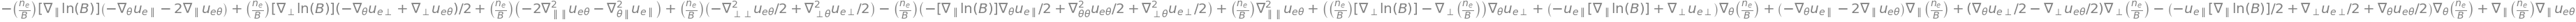

----------------------------------------------------


<IPython.core.display.Latex object>

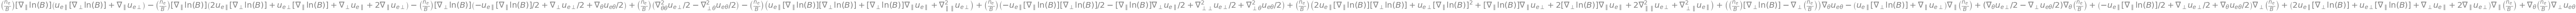

----------------------------------------------------


<IPython.core.display.Latex object>

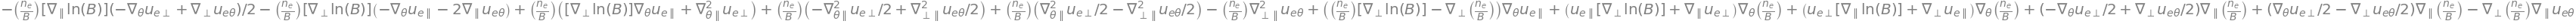

In [3]:
# Cell 1
##############################################################################################################################################
# BELOW WE COMPUTE THE DIVERGENCE OF THE GYROVISCOUS TENSOR
# First term of Eq. 1 of the notebook
def Pi_mag(q,u):
    v = [0,0,q]
    rotor = rot_vect(v)
    Du = grad_vect(u)
    w = vect_matr(rotor, Du)
    return w
# Potential of the econd term of Eq. 1 of the notebook
def csi(q,u):
    rotor = rot_vect(u)
    csi = q * rotor[2]
    return csi*Rational(1, 2)
# Second term of Eq. 1 of the notebook
def Pi_csi(q,u):
    w = grad_scal( - csi(q,u))
    return w
# Vector a of Eq. 2 of the notebook
def ae(q,u):
    one_parallel = [0,0,1]
    Du = grad_vect(u)
    rotor = rot_vect(u)
    v1_1 = prod_vect(one_parallel, Du[2])
    v1_2_0 = prod_vect(one_parallel, rotor)
    v1_2 = prod_vect(one_parallel, v1_2_0)
    v1 = scal_vect(q,sum_vect(scal_vect(3,v1_1) , v1_2))
    v2 = scal_vect(csi(q,u), one_parallel)
    v = (sum_vect(v1,v2))
    return v
# Third term of Eq. 1 of the notebook
def Pi_ae(q,u):
    a = ae(q,u)
    Da = grad_vect(a)
    Da_parallel = Da[2]
    negative_a_dlnB = scal_vect( - small*diff(B,x_pa)/B_sym, a)
    w = sum_vect(Da_parallel, negative_a_dlnB)
    return w
# Vector b of Eq. 3 of the notebook
def be(q,u):
    one_parallel = [0,0,1]
    Du = grad_vect(u)
    Du_parallel = Du[2]
    scalar = div_vect(u) - 3 * Du[2][2]
    w = sum_vect(Du_parallel, scal_vect(scalar*Rational(1, 2), one_parallel))
    return scal_vect(q,w)
# Fourth term of Eq. 1 of the notebook
def Pi_be(q,u):
    b = be(q,u)
    rotor = rot_vect(b)
    return scal_vect(-1, rotor)
# THIS CELL DISPLAYS THE THREE COMPONENT OF THE UNEXPANDED GYROVISCOUS TENSOR
exp_list = [Pi_mag(q,u), Pi_csi(q,u), Pi_ae(q,u), Pi_be(q,u)]
tit_list = ['Pi']

exp_Pi= [0.0,0.0,0.0]

Ge = [[0.0,0.0,0.0],
      [0.0,0.0,0.0],
      [0.0,0.0,0.0]]

for i in range(4):

    for j in range(3):

        # print(exp_list[i][j].dtype)
        # print(exp_Pi[j].dtype)

        exp_Pi[j] += exp_list[i][j]
coord_list = ['\perp', '\\theta', '\parallel']
for i in range(3):
    print('----------------------------------------------------')
    display(Latex(f'$\displaystyle\left(-\\frac{{\\nabla\cdot\Pi_e}}{{m_e n_e}}\\right)_{{{coord_list[i]}1}}$='))
    display_subs(exp_Pi[i].subs(small,1))

From its expression, it is apparent that at the zeroth order $\left(\frac{\nabla \cdot \Pi_{e}}{m_e n_e}\right)_0 = O( \omega_{ce} u_{\theta e0}\ \epsilon^2)$, being $\rho_e|\nabla Q| \sim |Q| \epsilon$.\
\
From the expression of $(Q)_1$, we have that its gradient is $(\nabla Q)_1 = \frac{1}{2} \left[(i \mathbf k Q_1 + \nabla Q_1) \exp(i\mathbf k\cdot \mathbf x - i \omega t) + CC\right]$, with with $|\nabla \ln Q_1|/k = O( \epsilon)$ by assumption.\
Then the gyroviscous tensor contributes with terms of order $O\left( \omega_{ce} \mathbf u_{e1}\ k^2\rho_e^2\right)$ and $O\left( \omega_{ce} \mathbf u_{e1}\ \epsilon\right)$ in the momentum equation, the latter being of the same order of the inertial terms $\frac{\partial \mathbf u_{e1}}{\partial t} = -i \omega \mathbf u_{e1}$. Then its contribution up to our order of interest is not negligible.\
\
We define the tensor of coefficient $\overline{\overline{G}}_{e}$ as
$$
\left( - \frac{\nabla \cdot {\Pi}_e}{m_e n_e} \right)_{1} = i \overline{\overline{G}}_{e}\mathbf u_{e1} \ ,
$$
as a compact way to express the divergence of the gyroviscous tensor as a linear funcction of $\mathbf u_{e1}$. This representation is useful when computing the momentum equations.\
The cell below computes and display the three components of $\left(-\frac{\nabla \cdot \Pi_{e}}{m_e n_e}\right)_1$ up to $O\left( \omega_{ce} \mathbf u_{e1}\ \epsilon\right)$. It also compuutes and displays the components of $\overline{\overline{G}}_{e}$.

In [4]:
# Cell 2
# THIS CELL COMPUTES THE DIVERGENCE OF THE FIRST ORDER GYROV. TENS.
exp_list = [Pi_mag(q0,ue1), Pi_csi(q0,ue1), Pi_ae(q0,ue1), Pi_be(q0,ue1)]
tit_list = ['Pi']
eq_list = ['(Eq. B.2)', '(Eq. B.3)', '(Eq. B.4)']
exp_Pi= [0.0,0.0,0.0]
Ge = [[0.0,0.0,0.0],
      [0.0,0.0,0.0],
      [0.0,0.0,0.0]]
for i in range(4):
    for j in range(3):
        exp_Pi[j] += exp_list[i][j]
for j in [0,1,2]:
    x_j = [x_pe, x_th, x_pa][j]
    print('-----------------------------------------------------')
    display(Latex(f'$\displaystyle\left(-\\frac{{\\nabla\cdot\Pi_e}}{{m_e n_e}}\\right)_{{{coord_list[j]}1}}$='))
    polynom = Poly(exp_Pi[j]/shape, small)
    expr = polynom.coeffs()
    order = len(expr)-1
    if order < 2:
        expr = small*expr[order]
    else:
        expr = small*expr[1] + expr[2]
    expr = expr.subs(x_pe,0).subs(x_pa,0).subs(n_0,1)
    display_subs(nsimplify(expr).subs(small,1))
    display(Latex(f'{eq_list[j]}'))
    print('--------------------')
    # display(Latex(f'$\partial\left(-\\frac{{\\nabla\cdot\Pi_e}}{{m_e n_e}}\\right)_{{{coord_list[j]}1}}/\partial u_{{\perp e1}}$='))
    display(Latex(f'$\left[\overline{{\overline{{G}}}}_e\\right]_{{{coord_list[j]}\perp}}$='))
    expr1 =  expr.subs(u_pe1_sym, 1).subs(u_th1_sym, 0).subs(u_pa1_sym, 0)
    Ge[j][0] = expr1
    display_subs(nsimplify(Ge[j][0]).subs(small,1))
    print('--------------------')
    # display(Latex(f'$\partial\left(-\\frac{{\\nabla\cdot\Pi_e}}{{m_e n_e}}\\right)_{{{coord_list[j]}1}}/\partial u_{{\\theta e1}}$='))
    display(Latex(f'$\left[\overline{{\overline{{G}}}}_e\\right]_{{{coord_list[j]}\\theta}}$='))
    expr1 =  expr.subs(u_pe1_sym, 0).subs(u_th1_sym, 1).subs(u_pa1_sym, 0)
    Ge[j][1] = expr1
    display_subs(nsimplify(Ge[j][1]).subs(small,1))
    print('--------------------')
    # display(Latex(f'$\partial\left(-\\frac{{\\nabla\cdot\Pi_e}}{{m_e n_e}}\\right)_{{{coord_list[j]}1}}/\partial u_{{\parallel e1}}$='))
    display(Latex(f'$\left[\overline{{\overline{{G}}}}_e\\right]_{{{coord_list[j]}\parallel}}$='))
    expr1 =  expr.subs(u_pe1_sym, 0).subs(u_th1_sym, 0).subs(u_pa1_sym, 1)
    Ge[j][2] = expr1
    display_subs(nsimplify(Ge[j][2]).subs(small,1))

-----------------------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

--------------------


<IPython.core.display.Latex object>

--------------------


<IPython.core.display.Latex object>

--------------------


<IPython.core.display.Latex object>

-----------------------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

--------------------


<IPython.core.display.Latex object>

--------------------


<IPython.core.display.Latex object>

--------------------


<IPython.core.display.Latex object>

-----------------------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

--------------------


<IPython.core.display.Latex object>

--------------------


<IPython.core.display.Latex object>

--------------------


<IPython.core.display.Latex object>

From here, we can input these results in the electron momentum equation.

## Section II: Derivation of the electron equations

Warm, magnetized electrons are described by their continuity and momentum equations, which read:
$$
    \frac{\partial n_e}{\partial t} + \nabla \cdot \left( n_e \mathbf{u}_e \right) =
    \nu_p n_e,
$$
$$
    \frac{\partial \mathbf{u}_e}{\partial t} + \mathbf{u}_e \cdot \nabla \mathbf{u}_e =
    - \frac{\nabla \cdot \overline{\overline{p}}_e}{m_e n_e} - \frac{e}{m_e} \left( -\nabla \phi + \mathbf{u}_e \times \mathbf{B} \right) - \nu_{e} \mathbf{u}_e ,
$$
represents the particle production rate, $\phi$ the electrostatic potential,   $\nu_{e}$ is used to model dissipative forces on the electrons coming from collisional phenomena, and $\overline{\overline{p}}_e$ 
the complete electron pressure tensor including the gyroviscous contribution. The system has to be completed with the energy equation, which we are not going to consider in the perturbation problem since we are neglecting temperature perturbations, i.e., $T_{e1} = 0$.  This assumption is reasonable for low frequency oscillations [Ref.5 \cite{bell21a}].\
The cell below computes and displays the continuity and momentum equations for electrons, yielding the same expressions shown in Eqs. C.3-6 of the manuscript.

In [ ]:
# Cell 3
# THIS CELL COMPUTES AND DISPLAYS THE CONTINUITY EQUATION FOR THE ELECTRONS
# Continuity Equation
def continuity_eq(u0,u1):
    lhs_0 = -1j * w * small * he1
    lhs_1 = scal_prod_vect(u0, grad_scal(he1))
    lhs_2 = div_vect(u1)
    x  = [x_pe, x_th, x_pa]
    lhs_3 = 0
    for i in [0,1,2]:
        lhs_3 += u1[i] * small * diff(n0, x[i]) / n_0
    lhs = lhs_0 + lhs_1 + lhs_2 + lhs_3
    return lhs
def display_continuity_eq(u0,u1):
    lhs = continuity_eq(u0,u1)
    lhs1 = complete_subs(lhs)
    print('Continuity equation:')
    display(nsimplify(lhs1).subs(small**2,0).subs(small,1))
    print('= 0')
    display(Latex('(Eq. C.3)'))
    print('-----------------------------------------------------------------------------------------------------------')
    return lhs
# THIS CELL COMPUTES AND DISPLAYS THE MOMENTUM EQUATION FOR THE ELECTRONS
nue = symbols('\\nu_e')
# The momentum equation is given by:
def momentum_eq(u0,u1):
    lhs_0 = scal_vect(-1j*small*(w+1j*nue), u1)
    lhs_1 = vect_matr(u0, grad_vect(u1))
    lhs_2 = matr_vect(Ge, u1)
    lhs_2 = scal_vect(-1, lhs_2)
    lhs_3 = prod_vect(scal_vect(-w_ce,[0,0,1]), (u1))
    lhs = sum_vect(lhs_0, lhs_1)
    lhs = sum_vect(lhs, lhs_2)
    lhs = sum_vect(lhs, lhs_3)
    rhs_0 = scal_vect(- c_e**2, grad_scal(he1))
    rhs_1 = grad_scal(phi1)
    rhs = sum_vect(rhs_0, rhs_1)
    return lhs, rhs
def display_momentum_eq(u0,u1):
    lhs, rhs = momentum_eq(u0,u1)
    lhs1 = complete_subs(lhs)
    rhs1 = complete_subs(rhs)
    display(Latex(r'Momentum in the $x_\perp$ direction:'))
    display(nsimplify(lhs1[0].subs(small**2,0)).subs(small,1))
    print('=')
    display(nsimplify(rhs1[0].subs(small**2,0)).subs(small,1))
    display(Latex('(Eq. C.4)'))
    print('-----------------------------------------------------------------------------------------------------------')
    display(Latex(r'Momentum in the $x_\theta$ direction:'))
    display(nsimplify(lhs1[1].subs(small**2,0)).subs(small,1))
    print('=')
    display(nsimplify(rhs1[1].subs(small**2,0)).subs(small,1))
    display(Latex('(Eq. C.5)'))
    print('-----------------------------------------------------------------------------------------------------------')
    display(Latex(r'Momentum in the $x_\parallel$ direction:'))
    display(nsimplify(lhs1[2].subs(small**2,0)).subs(small,1))
    print('=')
    display(nsimplify(rhs1[2].subs(small**2,0)).subs(small,1))
    display(Latex('(Eq. C.6)'))
    return lhs, rhs
lhs_continuity = display_continuity_eq(ue0, ue1)
lhs_momentum, rhs_momentum = display_momentum_eq(ue0, ue1)
# Compute matrix Ae
A_e = [[0,0,0,0],
       [0,0,0,0],
       [0,0,0,0],
       [0,0,0,0]]
def subs_ue(expr,i):
    ind = [[1,0,0,0],
           [0,1,0,0],
           [0,0,1,0]]
    exp_new = expr.subs(u_pe1_sym, ind[0][i]).subs(u_th1_sym, ind[1][i]).subs(u_pa1_sym, ind[2][i]).subs(phi1_sym,0).subs(he1_sym,0)
    return exp_new
def subs_he(expr,i):
    ind = [0,0,0,1]
    exp_new = expr.subs(he1_sym, ind[i]).subs(phi1_sym,0)
    return exp_new
new_lhs = [lhs_momentum[0], lhs_momentum[1], lhs_momentum[2], lhs_continuity]
new_rhs = [rhs_momentum[0], rhs_momentum[1], rhs_momentum[2], w-w]
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        LHS = new_lhs[i]
        RHS = new_rhs[i]
        if j < 3:
            a_e = subs_ue(LHS,j)
        else:
            if i < 3:
                a_e = -subs_he(RHS,j)
            else:
                a_e = LHS.subs(he1_sym,1).subs(phi1_sym,0).subs(u_pe1_sym,0).subs(u_th1_sym,0).subs(u_pa1_sym,0)

        A_e[i][j] = a_e.subs(u_pe0_sym,0).subs(u_pa0_sym,0)
Ae_sym = [[0,0,0,0],
          [0,0,0,0],
          [0,0,0,0],
          [0,0,0,0]]
# Additional symbols
we, wMe, wMpa, wBe, uNa, uTa, varka_pe, varka_th, varka_pa, wNe, k, lambda_pa, kTa, eHa =\
      symbols('\omega_e, \omega_{M\perp}, \omega_{M\parallel}, \omega_{B}, u_{n\parallel}, u_{T\parallel}, \hat\\varkappa_{\perp}, \hat\\varkappa_{\\theta},'\
              '\hat\\varkappa_\parallel, \omega_{N}, k, \hat\lambda_{\parallel}, \\varkappa_{T}, \hat\eta_{\parallel}')
# Compute symbolic Ae
Ae_sym[0+1][0+1] = -1j * small * (we + wMe/2 - wBe/2)
Ae_sym[0+1][1+1] = -1j * small * k_pe *(wMe/(2*k_th)  - w_ce * rho_e**2 * Dpe_lnu_th) + w_ce * (1 - k**2*rho_e**2/2)
Ae_sym[0+1][2+1] = small * k_th * 1j * w_ce * rho_e**2 * (kTa + lambda_pa)# + w_ce * k_pa * rho_e**2)
Ae_sym[0+1][3-3] = c_e**2 * (1j * k_pe + small * Dpe_lnhe1)
#
Ae_sym[1+1][0+1] = 1j * small * k_pe *(wMe/(2*k_th) - w_ce * rho_e**2 * Dpe_lnu_pe) - w_ce * (1 - k**2*rho_e**2/2)
Ae_sym[1+1][1+1] = -1j * small * (we + wMe/2 - wBe/2)
Ae_sym[1+1][2+1] = - small * k_pe * 1j * w_ce * rho_e**2 * (kTa + lambda_pa)# + w_ce * k_pa * rho_e**2)
Ae_sym[1+1][3-3] = c_e**2 * (1j * k_th)
#
Ae_sym[2+1][0+1] = - small * k_th * w_ce * rho_e**2 * (1j * varka_pe)# - k_pa)
Ae_sym[2+1][1+1] = - small * k_pe * w_ce * rho_e**2 * (-1j * varka_th)# + k_pa)
Ae_sym[2+1][2+1] = - 1j * small * (we + wMe - 2*wBe)
Ae_sym[2+1][3-3] = small * c_e**2 * eHa#(1j * k_pa + Dpa_lnhe1)
#
Ae_sym[3-3][0+1] = 1j * k_pe  + small * (Dpe_lnu_pe + w_ce/c_e**2 * (wBe - wNe)/k_th)
Ae_sym[3-3][1+1] = 1j * k_th
Ae_sym[3-3][2+1] = small * (lambda_pa)# + 1j * k_pa)
Ae_sym[3-3][3-3] = -1j * small * we
# THIS CELL THE SYMBOLIC MATRIX OF COEFFICENTS Ae
w_pe, w_pa = symbols('\\omega_{\perp}, \\omega_{\parallel}')
Ae_sym[0+1][0+1] = - 1j * small * (w_pe)
Ae_sym[1+1][1+1] = - 1j * small * (w_pe)
Ae_sym[2+1][2+1] = - 1j * small * (w_pa)
Ae_sym1 = [[0,0,0,0],
           [0,0,0,0],
           [0,0,0,0],
           [0,0,0,0]]
for i in range(4):
    for j in range(4):
        Ae_sym1[i][j] = Ae_sym[i][j]
Ae_print = Matrix(Ae_sym1)

Continuity equation:


c:\Users\Utente\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Utente\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Utente\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Utente\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The Mathte

= 0


<IPython.core.display.Latex object>

-----------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

=


<IPython.core.display.Latex object>

-----------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

=


<IPython.core.display.Latex object>

-----------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

=


<IPython.core.display.Latex object>

## Section III: Expression and determinant of $A_e$

Now, we can make some proper symbolic substitutions to render the expressions more manageable. We define the following frequencies:
$$
\omega_{Ne} \equiv - \frac{c_e^2}{\omega_{ce}} \nabla_\perp \ln n_0 , \qquad \omega_{B} \equiv - \frac{c_e^2}{\omega_{ce}} \nabla_\perp \ln B_0 , \qquad \omega_{Te} \equiv - \frac{c_e^2}{\omega_{ce}} \nabla_\perp \ln T_e , \qquad \omega_{\perp} \equiv - \frac{c_e^2}{\omega_{ce}} \nabla_\perp \ln \frac{p_{e0}}{B^2} ,
$$
$$
\omega_e \equiv \omega - k_\theta u_{\theta e0} , \qquad \omega_{M\perp} \equiv \omega_N - { 2 \omega_{B}}, \qquad \omega_{M\parallel} \equiv \omega_e - {\omega_{M\perp} + 2 \omega_{B}}
$$
which correspond to the definitions found in the list of symbols Eq. A.1. The first three definitions are drift frequencies, due to gradients in the equilibrium electron density, magnetic field and electron temperature, respectively. $\omega_e$ is the Doppler-shifted wave frequency as seen by an observer moving with the electron refernce frame, $\omega_\perp$ is the same Doppler-shifted frequency corrected with the leading terms coming from the projection of the gyroviscous tensor on the plane perpendicular to $\mathbf B$, while $\omega_\parallel$ is analogous to $\omega_\perp$ but with the correction coming from the projection of $\nabla\cdot\Pi_{e1}$ in the parallel direction.\
We further define the following parallel gradients of zeroth-order quantities, as shown in Eq. C.9 of the manuscript,
$$
\varkappa_n \equiv \nabla_\parallel \ln \frac{n_0}{\sqrt{B}} , \qquad \varkappa_T \equiv \nabla_\parallel \ln \frac{T_e}{\sqrt{B^3}} ,
$$
and the parallel gradients of first-order quantities, defined as in Eq. C.10,
$$
\varkappa_\perp \equiv \nabla_\parallel \ln (\sqrt B u_{\perp e1}) , \qquad \varkappa_\perp \equiv \nabla_\parallel \ln (\sqrt B u_{\theta e1}) , \qquad \varkappa_\parallel \equiv \nabla_\parallel \ln \left(\frac{u_{\parallel e1}}{\sqrt B}\right) .
$$
To aid us in the symbolic manipulation of the determinant of the matrix of coefficients $A_e$, we will make use of the following additional definitions:
$$
\hat\varkappa_\perp \equiv \varkappa_\perp + i k_\parallel , \qquad \hat\varkappa_\theta \equiv \varkappa_\theta + i k_\parallel , \qquad \hat\varkappa_\parallel \equiv \varkappa_\parallel + i k_\parallel , \qquad \hat\lambda_\parallel \equiv \hat\varkappa_\parallel + \varkappa_n , \qquad \hat\eta_\parallel \equiv \nabla_\parallel \ln h_{e1} + i k_\parallel .
$$
The cell below displays the matrix of coefficients $A_e$, adopting the above definitions.

In [ ]:
# Cell 4
# THIS CELL DISPLAYS THE SYMBOLIC MATRIX OF COEFFICENTS Ae
print('------------------------------------------------------------------------------------------------------------')
display(Latex(r'$A_e=$'))
display(nsimplify(Ae_print.subs(small,1).subs(w_pe,we + wMe/2+1j*nue).subs(w_pa,we + wMpa+1j*nue)))

------------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

⎡                                                                             
⎢                 -ⅈ⋅\omegaₑ                                        [\nabla_{\
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢  2                                                                          
⎢cₑ ⋅([\nabla_{\perp}\ln(h_{e1})] + ⅈ⋅k_\perp)                                
⎢                                                                             
⎢                                                                             
⎢                                                             ⎛       2  2    
⎢                   2                                         ⎜  \rhoₑ ⋅k     
⎢               ⅈ⋅cₑ ⋅k_\theta                  - \o

Next, we calculate the inverse of the determinant of $A_e$, which we refer to as $D_e\equiv - \text{det}(A_e)$.\
At the leading order in $\epsilon$, $D_e$ can be subdivided in two terms, the first depending solely on the perpendicular dynamics of the electrons, the second only on the parallel dynamics. We express the first term as $D_{e\perp} \equiv D_e|_{k_\parallel,\nabla_\parallel=0}$, where $k_\parallel,\nabla_\parallel=0$ symbolically indicates the complete neglect of electron dynamics along the parallel direction. We express the remaining term of $D_e$ through the parallel gradient drift frequency $\Omega_\parallel$ defined as
$$
\Omega_\parallel^2 \equiv - \frac{D_e - D_{e\perp}}{\omega_{ce}^2} .
$$
The cell below computes and displays both $D_{e\perp}$ and $\Omega_\parallel^2$.

<IPython.core.display.Latex object>

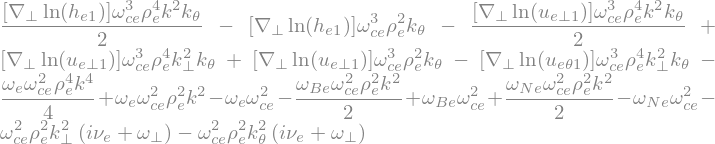

------------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

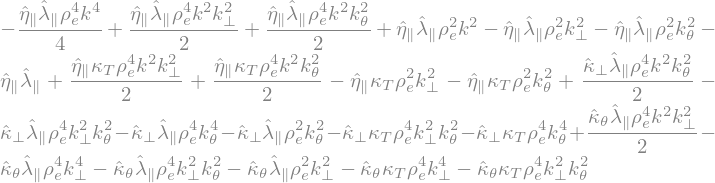

In [176]:
# Cell 4
# THIS CELL COMPUTES THE DETERMINANT OF THE SYMBOLIC MATRIX Ae UP TO THE SECOND ORDER IN varepsilon
De = det4(Ae_sym)
De = De.subs(u_pe0,0).subs(u_pa0,0).subs(u_th0,u_th0_sym)
De = De.subs(x_pe,0).subs(x_th,0).subs(x_pa,0)
PolyDe = Poly(De, small)
degree_De = degree(PolyDe, gen=small)
order_De = len(PolyDe.all_coeffs())
De_0 = PolyDe.all_coeffs()[order_De-3]
# THIS CELL ONLY PRINTS THE PART OF THE DETERMINANT THAT DEPENDS ON THE PERPENDICULAR DYNAMICS
De_0_pe = De_0.subs(varka_pe,0).subs(varka_th,0).subs(varka_pa,0).subs(uNa,0).subs(uTa,0)\
    .subs(Dpa_lnu_pa,0).subs(Dpa_lnu_pe,0).subs(Dpa_lnu_th,0).subs(Dpa_lnhe1,0).subs(k_pa,0).subs(eHa,0)
display(Latex(r'$\displaystyle-\frac{{D_e}_\perp}{\omega_\parallel+i\nu_e}=$'))
display(nsimplify(simplify(De_0_pe).subs(c_e,rho_e*w_ce).subs(w_pe,w_pe+1j*nue)/w_pa))
De_0_pa = De_0.subs(w_pa,0)
print('------------------------------------------------------------------------------------------------------------')
display(Latex(r'$\displaystyle\frac{\Omega^2_\parallel}{c_e^2}=$'))
display(nsimplify(simplify(De_0_pa).subs(k_pa,0).subs(c_e,rho_e*w_ce)/w_ce**4/rho_e**2))

Recalling the definitions of $\omega_e$ and $\omega_\perp$, $D_{e\perp}$ can be rewritten as
$$
D_{e\perp} = \omega_{ce}^2 (\omega_{\parallel} + i\nu_e) \left[ \omega_e \left( 1 - \frac{\rho_e^2k^2}{2} \right)^2 + k^2\rho_e^2 (\omega_\perp + i \nu_e) + - \frac{k_\theta c_e^2}{\omega_{ce}} \nabla_\perp \ln \frac{n_0 u_{\perp e1}}{B h_{e1}} \left( 1 - \frac{\rho_e^2k^2}{2} \right) + \rho_e^2 k_\perp^2 \frac{k_\theta c_e^2}{\omega_{ce}} \nabla_\perp \ln \frac{u_{\theta e1}}{u_{\perp e1}} \right] .
$$
On theother hand, remembering the definitions of $\hat\lambda_\parallel$, $\hat\eta_\parallel$, $\hat\varkappa_\perp$ and $\hat\varkappa_\theta$, the expression of $\Omega^2_\parallel$ can be simplified as
$$
\frac{\Omega^2_\parallel}{c_e^2} = - \left[ \hat\lambda_\parallel \left( 1 + \frac{k^2\rho_e^2}{2} \right) + \varkappa_T \rho_e^2 k^2 \right] \left[ \hat\eta_\parallel \left( 1 - \frac{k^2\rho_e^2}{2} \right) + \hat\varkappa_\perp \rho_e^2 k_\theta^2 + \hat\varkappa_\theta \rho_e^2 k_\perp^2 \right]
$$
$$
= - \left[ \left( ik_\parallel + \varkappa_n + \varkappa_\parallel \right) \left( 1 + \frac{k^2\rho_e^2}{2} \right) + \varkappa_T \rho_e^2 k^2 \right] \left[ \left( ik_\parallel + \nabla_\parallel \ln h_{e1} \right) \left( 1 - \frac{k^2\rho_e^2}{2} \right) + ik_\parallel k^2 \rho_e^2 + \varkappa_\perp \rho_e^2 k_\theta^2 + \varkappa_\theta \rho_e^2 k_\perp^2 \right]
$$
which corresponds to Eq. C.8 of the manuscript.\
\
Summing the expressions for $D_{e\perp}$ and  $-\omega_{ce}^2 \Omega_\parallel^2$ returns the full expression of $D_e$ from Eq. C.7 of the manuscript.

## First-order gradients and closure of the electron system of equations

As a final step, we compute the gradients of the first-order plasma quantities as functions of the gradients of the zeroth-order quantities.\
The expression for $h_{e1}$ is quite trivial to recover using Kramer's rule,
$$
\det(A_e) h_{e1} = \frac{1}{c_e^2} \det(A_e) \bigg|_{\substack{{\omega_e=0}\\{h_{e1}\to\phi_1}}}
$$
$$
= -\frac{D_e}{c_e^2} \left\{ 1 - \frac{\omega_{ce}^2}{D_e} \left( 1 - \frac{k^2 \rho_e^2}{2} \right) \left( \omega_\parallel + i \nu_{e} \right) \bigg[ \omega_{e} \left( 1 - \frac{k^2 \rho_e^2}{2} \right) + \frac{k_{\theta} c_e^2}{\omega_{ce}} \nabla_\perp \ln  \frac{h_{e1}}{\phi_1}  \bigg] - \frac{\Omega_\parallel^2 - \Omega_\parallel^2 \big|_{h_{e1}\to\phi_1}}{D_e} \right\} 
$$
which corresponds to Eq. C.11 of the manuscript. Here, the subscript $h_{e1}\to\phi_1$ indicates the substitution of the terms $\nabla \ln h_{e1}$ with gradients of the electric potential $\nabla \ln \phi_1$. \
Derivating in space the above relation yields, neglecting $\nabla^2 \ln Q_0$ and $\nabla^2 \ln Q_1$ terms,
$$
\nabla \ln h_{e1} = \nabla \ln \frac{\phi_1}{T_e}
$$
which is Eq. C.13 of the manuscript. We will feed this information to the symbolic manipulator at the next cell, in order to facilitate the computaions of the velocities, with the assumption $\nabla_\parallel \ln h_{e1} \simeq \nabla_\parallel \ln \phi_1$, being $\nabla_\parallel \ln T_e$ negligible with respect to $\nabla_\parallel \ln p_{e0}$. This assumptions is justified by the available simulation data, as presented in Table V.I of the manuscript.\
Using this and considering $|\nabla_\parallel \ln T_e / \nabla_\parallel \ln p_{e0}| \ll 1$ allow us to simplify the expression of $h_{e1}$ as (Eq. C.14)
$$
\frac{h_{e1}}{e \phi_1 / m_e} = 
    \frac{1}{c_e^2}
    - \frac{\omega_{ce}^2}{c_e^2 D_e} \left( 1 - \frac{k^2 \rho_e^2}{2} \right)^2 \left( \omega_\parallel + i \nu_{e} \right) \left( \omega_e + \frac{\omega_{Te}}{1 - {k^2 \rho_e^2}/{2}}  \right) .
$$
The velocities can be similarly computed. The cell below computes and displays $\mathbf u_{e1} (e\phi_1/m_e)^{-1}$ at the leading order in $\epsilon$.

<IPython.core.display.Latex object>

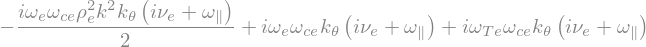

<IPython.core.display.Latex object>

------------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

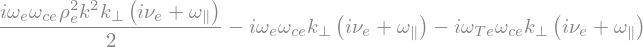

<IPython.core.display.Latex object>

------------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

In [221]:
# Cell 5
# THIS CELL COMPUTES u_{e1} TO THE LEADING ORDER IN \varepsilon
Dpe_lnT, Dpa_lnT, wTe = symbols(' [\\nabla_{\perp}\ln(T_{e})], [\\nabla_{\parallel}\ln(T_{e})], \omega_{Te}')
k_phi = grad_scal(phi1)
k_phi = [0*phi1_sym, k_phi[0], k_phi[1], k_phi[2]]
# Computing u_pe1
Ae_sym_pe = [[0,0,0,0],
             [0,0,0,0],
             [0,0,0,0],
             [0,0,0,0]]
for i in range(4):
    for j in range(4):
        Ae_sym_pe[i][j] = Ae_sym[i][j]
for i in range(4):
    Ae_sym_pe[i][1] = k_phi[i].subs(phi1_sym,1).subs(x_pe,0).subs(x_th,0).subs(x_pa,0).subs(Dpe_lnphi1, Dpe_lnhe1 - w_ce * wTe / (c_e**2 * k_th))\
    .subs(Dpa_lnphi1+1j*k_pa, eHa)
Upe = det4(Ae_sym_pe)
Upe = expand(Upe, small)
Upe = Upe.subs(small**3,0).subs(small**4,0).subs(w_pa,w_pa+1j*nue)
display(Latex(r'$\displaystyle - D_e \frac{u_{\perp e1}}{e\phi_1/m_e}=$'))
display(nsimplify(Upe.subs(small,1)))
display(Latex('(Eq. C.15)'))
print('------------------------------------------------------------------------------------------------------------')
# Computing u_th1
Ae_sym_th = [[0,0,0,0],
             [0,0,0,0],
             [0,0,0,0],
             [0,0,0,0]]
for i in range(4):
    for j in range(4):
        Ae_sym_th[i][j] = Ae_sym[i][j]
for i in range(4):
    Ae_sym_th[i][2] = k_phi[i].subs(phi1_sym,1).subs(x_pe,0).subs(x_th,0).subs(x_pa,0).subs(Dpe_lnphi1, Dpe_lnhe1 - w_ce * wTe / (c_e**2 * k_th))\
    .subs(Dpa_lnphi1+1j*k_pa, eHa)
Uth = det4(Ae_sym_th)
Uth = expand(Uth, small)
Uth = Uth.subs(small**3,0).subs(small**4,0).subs(w_pa,w_pa+1j*nue)
display(Latex(r'$\displaystyle - D_e \frac{u_{\theta e1}}{e\phi_1/m_e}=$'))
display(nsimplify(Uth.subs(small,1)))
display(Latex('(Eq. C.16)'))
print('------------------------------------------------------------------------------------------------------------')
# Computing u_pa1
Ae_sym_pa = [[0,0,0,0],
             [0,0,0,0],
             [0,0,0,0],
             [0,0,0,0]]
for i in range(4):
    for j in range(4):
        Ae_sym_pa[i][j] = Ae_sym[i][j]
for i in range(4):
    Ae_sym_pa[i][3] = k_phi[i].subs(phi1_sym,1).subs(x_pe,0).subs(x_th,0).subs(x_pa,0).subs(Dpe_lnphi1, Dpe_lnhe1 - w_ce * wTe / (c_e**2 * k_th))\
    .subs(Dpa_lnphi1+1j*k_pa, eHa)
Upa = det4(Ae_sym_pa)
Upa = expand(Upa, small)
Upa = Upa.subs(small**3,0).subs(small**4,0).subs(w_pa,w_pa+1j*nue)
display(Latex(r'$\displaystyle - D_e \frac{u_{\parallel e1}}{e\phi_1/m_e}=$'))
display(nsimplify(Upa.subs(small,1)))

The first two relations don't need further simplification. The last can be rearranged as
$$
 - D_e \frac{u_{\parallel e1}}{e\phi_1/m_e}= - i \omega_{ce}^2 \left[ \hat\eta_\parallel \left( 1 - \frac{\rho_e^2 k^2}{2} \right) + \hat\varkappa_\perp \rho_e^2 k_\theta^2 + \hat\varkappa_\theta \rho_e^2 k_\perp^2 \right] \left[ \omega_e \left( 1 - \frac{\rho_e^2 k^2}{2} \right) +  \omega_{Te}  \right]
$$
$$
= - i \omega_{ce}^2 \left[ \left( i k_\parallel + \nabla_\parallel \ln \phi_1 \right) \left( 1 - \frac{\rho_e^2 k^2}{2} \right) + i k_\parallel k^2 \rho_e^2 + \varkappa_\perp \rho_e^2 k_\theta^2 + \varkappa_\theta \rho_e^2 k_\perp^2 \right] \left[ \omega_e \left( 1 - \frac{\rho_e^2 k^2}{2} \right) +  \omega_{Te}  \right]
$$
which corresponds to Eq. C.17 of the manuscript. Derivating in space allows us to obtain Eqs. C.18 and C.19:
$$
\nabla \ln u_{\perp e1} = \nabla \ln u_{\theta e1} =  \nabla \ln \frac{\phi_1}{B} , \qquad \nabla \ln u_{\parallel e1} = \nabla \ln \phi_1 .
$$
We can now feed allof these relations to the symbolic manipulator, and recompute $D_{e\perp}$ and $\Omega_\parallel^2$ as functions of $\nabla \ln \phi_1$.
We reformulate here the expressions of the parallel gradients for convenience,
$$
\hat\varkappa_\perp = i k_\parallel + \nabla_\parallel \ln \frac{n_0 \phi_1}{B} - \nabla_\
$$
The cell below recomputes and displays the aforementioned terms.

## Bibliography

Ref.1 - \
Ref.2 - \
Ref.3 - \
Ref.4 - \